In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 11 15:43:34 2020
Time_Series dataset

@author: neshragh
"""

from sklearn.cluster import AffinityPropagation
#from sklearn import metrics
import pandas as pd


##################################################################



In [4]:

##open a dataset
df = pd.read_csv('During1week.csv')

#dc = df.loc[(df.Date == '6/21/2019') & (df.Time >= '18:00:00') & (df.Time <= '19:00:00')]
#fix until this date
# =============================================================================
# dc=df_data.loc[(df_data.Sensor =='UP')]
# print(dc)
# =============================================================================
#Filter dataset
#data = df_data[['Date', 'Time','Count', 'Status', 'Sensor', 'Type', 'Position','Location', 'Location Code']] .values
#df_filtered = data[(df_data.Time >='11') & (df_data.Time <='11:30') ]
##print(len(df_filtered))
#print(df_filtered)

#Split Apply Combine
#g = df_data.groupby('Time')
#for Time, Time_df_data in g :
#    print(Time_df_data)
#    print(Time)
#g.get_group('Time' == '9:59:51' )

# #############################################################################


In [6]:
# #############################################################################

#Choose data for algorithm
X= df.loc[df.index<50000,['Position','Count']].to_numpy()
#X= df.loc[df.index<90000,['Position','Count']].to_numpy()

#labels_true = dc.loc[df.index<90000,'Time'].to_numpy()


# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50, damping=.84 , max_iter= 100 ).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

#print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))




C:\Users\neshragh\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


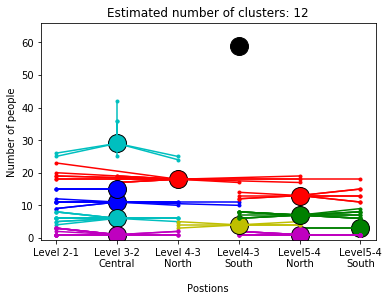

In [7]:

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle


plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
   #CODE FOR POINTS OF BRANCHES 
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=18)

#CODE FOR LINES OF BRANCHES    
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.xlabel('Postions',labelpad=15)
plt.ylabel('Number of people')

frame =plt.gca()
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)

plt.ylim(-0.7,66)

plt.xticks([1,2,3,4,5,6], ["Level 2-1", "Level 3-2\nCentral", "Level 4-3\nNorth",
           "Level4-3\nSouth", "Level5-4\nNorth", "Level5-4\nSouth"])
#plt.xlim(1,6)
plt.show()
